# Project Foundations for Data Science: FoodHub Data Analysis

**Marks: 60**

### Context

The number of restaurants in New York is increasing day by day. Lots of students and busy professionals rely on those restaurants due to their hectic lifestyles. Online food delivery service is a great option for them. It provides them with good food from their favorite restaurants. A food aggregator company FoodHub offers access to multiple restaurants through a single smartphone app.

The app allows the restaurants to receive a direct online order from a customer. The app assigns a delivery person from the company to pick up the order after it is confirmed by the restaurant. The delivery person then uses the map to reach the restaurant and waits for the food package. Once the food package is handed over to the delivery person, he/she confirms the pick-up in the app and travels to the customer's location to deliver the food. The delivery person confirms the drop-off in the app after delivering the food package to the customer. The customer can rate the order in the app. The food aggregator earns money by collecting a fixed margin of the delivery order from the restaurants.

### Objective

The food aggregator company has stored the data of the different orders made by the registered customers in their online portal. They want to analyze the data to get a fair idea about the demand of different restaurants which will help them in enhancing their customer experience. Suppose you are hired as a Data Scientist in this company and the Data Science team has shared some of the key questions that need to be answered. Perform the data analysis to find answers to these questions that will help the company to improve the business.

### Data Description

The data contains the different data related to a food order. The detailed data dictionary is given below.

### Data Dictionary

* order_id: Unique ID of the order
* customer_id: ID of the customer who ordered the food
* restaurant_name: Name of the restaurant
* cuisine_type: Cuisine ordered by the customer
* cost: Cost of the order
* day_of_the_week: Indicates whether the order is placed on a weekday or weekend (The weekday is from Monday to Friday and the weekend is Saturday and Sunday)
* rating: Rating given by the customer out of 5
* food_preparation_time: Time (in minutes) taken by the restaurant to prepare the food. This is calculated by taking the difference between the timestamps of the restaurant's order confirmation and the delivery person's pick-up confirmation.
* delivery_time: Time (in minutes) taken by the delivery person to deliver the food package. This is calculated by taking the difference between the timestamps of the delivery person's pick-up confirmation and drop-off information

### Let us start by importing the required libraries

In [1]:
# import libraries for data manipulation
import numpy as np
import pandas as pd

# import libraries for data visualization
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# to restrict the float value to 2 decimal places
pd.set_option('display.float_format', lambda x: '%.2f' % x)

### Understanding the structure of the data

In [3]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [4]:
# read the data
df = pd.read_csv('/content/drive/MyDrive/DSML/Food Hub Project Assessment/foodhub_order.csv')

In [5]:
# copy the original file for redundancy
data = df.copy()


In [6]:
# returns the first 5 rows
df.head()

,order_id,customer_id,restaurant_name,cuisine_type,cost_of_the_order,day_of_the_week,rating,food_preparation_time,delivery_time
0,1477147,337525,Hangawi,Korean,30.75,Weekend,Not given,25,20
1,1477685,358141,Blue Ribbon Sushi Izakaya,Japanese,12.08,Weekend,Not given,25,23
2,1477070,66393,Cafe Habana,Mexican,12.23,Weekday,5,23,28
3,1477334,106968,Blue Ribbon Fried Chicken,American,29.20,Weekend,3,25,15
4,1478249,76942,Dirty Bird to Go,American,11.59,Weekday,4,25,24


In [7]:
df.tail()

,order_id,customer_id,restaurant_name,cuisine_type,cost_of_the_order,day_of_the_week,rating,food_preparation_time,delivery_time
1893,1476701,292602,Chipotle Mexican Grill $1.99 Delivery,Mexican,22.31,Weekend,5,31,17
1894,1477421,397537,The Smile,American,12.18,Weekend,5,31,19
1895,1477819,35309,Blue Ribbon Sushi,Japanese,25.22,Weekday,Not given,31,24
1896,1477513,64151,Jack's Wife Freda,Mediterranean,12.18,Weekday,5,23,31
1897,1478056,120353,Blue Ribbon Sushi,Japanese,19.45,Weekend,Not given,28,24


In [8]:
df.sample(10,random_state = 10)

,order_id,customer_id,restaurant_name,cuisine_type,cost_of_the_order,day_of_the_week,rating,food_preparation_time,delivery_time
1811,1477664,47440,Blue Ribbon Fried Chicken,American,29.30,Weekend,4,28,16
97,1476689,305522,Shake Shack,American,24.20,Weekday,4,29,29
1605,1476614,138462,Chipotle Mexican Grill $1.99 Delivery,Mexican,29.10,Weekday,5,21,29
1379,1476587,355713,TAO,Japanese,9.22,Weekend,5,26,25
1482,1477451,125262,Rubirosa,Italian,8.54,Weekend,Not given,34,28
1878,1477194,62540,Blue Ribbon Sushi,Japanese,5.92,Weekday,Not given,27,31
1768,1477075,52832,ilili Restaurant,Middle Eastern,31.43,Weekday,3,26,29
1491,1477345,339144,The Meatball Shop,Italian,5.05,Weekend,Not given,29,19
318,1476979,81166,Dos Caminos,Mexican,6.11,Weekend,5,26,21
767,1477811,373152,Blue Ribbon Sushi,Japanese,24.30,Weekend,5,32,28


#### Observations:

The DataFrame has 9 columns as mentioned in the Data Dictionary. Data in each row corresponds to the order placed by a customer.

### **Question 1:** How many rows and columns are present in the data? [0.5 mark]

In [9]:
# Write your code here
df.shape

(1898, 9)

#### Observations:

The dataset has 1898 rows and 9 columns


### **Question 2:** What are the datatypes of the different columns in the dataset? (The info() function can be used) [0.5 mark]

In [10]:
# Use info() to print a concise summary of the DataFrame
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1898 entries, 0 to 1897
Data columns (total 9 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   order_id               1898 non-null   int64  
 1   customer_id            1898 non-null   int64  
 2   restaurant_name        1898 non-null   object 
 3   cuisine_type           1898 non-null   object 
 4   cost_of_the_order      1898 non-null   float64
 5   day_of_the_week        1898 non-null   object 
 6   rating                 1898 non-null   object 
 7   food_preparation_time  1898 non-null   int64  
 8   delivery_time          1898 non-null   int64  
dtypes: float64(1), int64(4), object(4)
memory usage: 133.6+ KB


#### Observations:
Of the 9 columns, 4 columns (order_id, customer_id, food_preparation_time, and delivery_time) are of int dtype, columns (cost_of_the_order) is of float dtype, and 4 columns (restaurant_name, cuisine_type, day_of_the_week, and rating) are of the object dtype.
The column rating has missing data, as a result the dtype is object. The missing data needs to be handled and the dtype will need to be converted appropriately


### **Question 3:** Are there any missing values in the data? If yes, treat them using an appropriate method. [1 mark]

In [11]:
# Write your code here
df.isna().sum()

order_id                 0
customer_id              0
restaurant_name          0
cuisine_type             0
cost_of_the_order        0
day_of_the_week          0
rating                   0
food_preparation_time    0
delivery_time            0
dtype: int64

In [12]:
df["rating"].value_counts()

Not given    736
5            588
4            386
3            188
Name: rating, dtype: int64

In [13]:
#replace Not given rating with nan
df["rating"] = df["rating"].replace(["Not given"], np.nan)

#change the data type to float
df["rating"] = df["rating"].astype(float)

In [14]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1898 entries, 0 to 1897
Data columns (total 9 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   order_id               1898 non-null   int64  
 1   customer_id            1898 non-null   int64  
 2   restaurant_name        1898 non-null   object 
 3   cuisine_type           1898 non-null   object 
 4   cost_of_the_order      1898 non-null   float64
 5   day_of_the_week        1898 non-null   object 
 6   rating                 1162 non-null   float64
 7   food_preparation_time  1898 non-null   int64  
 8   delivery_time          1898 non-null   int64  
dtypes: float64(2), int64(4), object(3)
memory usage: 133.6+ KB


In [15]:
df.isna().sum()

order_id                   0
customer_id                0
restaurant_name            0
cuisine_type               0
cost_of_the_order          0
day_of_the_week            0
rating                   736
food_preparation_time      0
delivery_time              0
dtype: int64

#### Observations:
There are 736 records that don't have a user rating. These were replaced by nan and the data type of rating was changed to float

### **Question 4:** Check the statistical summary of the data. What is the minimum, average, and maximum time it takes for food to be prepared once an order is placed? [2 marks]

In [16]:
# Write your code here
df.describe().T

,count,mean,std,min,25%,50%,75%,max
order_id,1898.00,1477495.50,548.05,1476547.00,1477021.25,1477495.50,1477969.75,1478444.00
customer_id,1898.00,171168.48,113698.14,1311.00,77787.75,128600.00,270525.00,405334.00
cost_of_the_order,1898.00,16.50,7.48,4.47,12.08,14.14,22.30,35.41
rating,1162.00,4.34,0.74,3.00,4.00,5.00,5.00,5.00
food_preparation_time,1898.00,27.37,4.63,20.00,23.00,27.00,31.00,35.00
delivery_time,1898.00,24.16,4.97,15.00,20.00,25.00,28.00,33.00


#### Observations:
The food preparation time min, mean, median and max were 20 min, 27 min, 27 min and 35 min respectively.
Similarly the delivery time min, mean, median and max were 15 min, 24 min, 25 min and 33 min respectively.
Since both The food preperation time and delivery time have mean and median pretty close to each other, it looks like the data has no skew


In [17]:
# Making a list of all categorical variables
cat_cols =  ['customer_id', 'restaurant_name', 'cuisine_type', 'day_of_the_week', 'rating']

# Printing the count of unique categorical levels in each column
for column in cat_cols:
    print(df[column].value_counts())
    print("-" * 50)

52832     13
47440     10
83287      9
250494     8
259341     7
          ..
385426     1
254913     1
289597     1
74412      1
397537     1
Name: customer_id, Length: 1200, dtype: int64
--------------------------------------------------
Shake Shack                  219
The Meatball Shop            132
Blue Ribbon Sushi            119
Blue Ribbon Fried Chicken     96
Parm                          68
                            ... 
Sushi Choshi                   1
Dos Caminos Soho               1
La Follia                      1
Philippe Chow                  1
'wichcraft                     1
Name: restaurant_name, Length: 178, dtype: int64
--------------------------------------------------
American          584
Japanese          470
Italian           298
Chinese           215
Mexican            77
Indian             73
Middle Eastern     49
Mediterranean      46
Thai               19
French             18
Southern           17
Korean             13
Spanish            12
Vietnamese 

In [18]:
# Printing the percentage of unique categorical levels in each column
for column in cat_cols:
    print(df[column].value_counts(normalize=True))
    print("-" * 50)

52832    0.01
47440    0.01
83287    0.00
250494   0.00
259341   0.00
         ... 
385426   0.00
254913   0.00
289597   0.00
74412    0.00
397537   0.00
Name: customer_id, Length: 1200, dtype: float64
--------------------------------------------------
Shake Shack                 0.12
The Meatball Shop           0.07
Blue Ribbon Sushi           0.06
Blue Ribbon Fried Chicken   0.05
Parm                        0.04
                            ... 
Sushi Choshi                0.00
Dos Caminos Soho            0.00
La Follia                   0.00
Philippe Chow               0.00
'wichcraft                  0.00
Name: restaurant_name, Length: 178, dtype: float64
--------------------------------------------------
American         0.31
Japanese         0.25
Italian          0.16
Chinese          0.11
Mexican          0.04
Indian           0.04
Middle Eastern   0.03
Mediterranean    0.02
Thai             0.01
French           0.01
Southern         0.01
Korean           0.01
Spanish          0

### **Question 5:** How many orders are not rated? [1 mark]

In [19]:
# Write the code here
df["rating"].isna().sum()

736

In [20]:
df["rating"].value_counts(normalize = True)

5.00   0.51
4.00   0.33
3.00   0.16
Name: rating, dtype: float64

#### Observations:
There are 736 orders that were not rated


### Exploratory Data Analysis (EDA)

### Univariate Analysis

### **Question 6:** Explore all the variables and provide observations on their distributions. (Generally, histograms, boxplots, countplots, etc. are used for univariate exploration.) [9 marks]

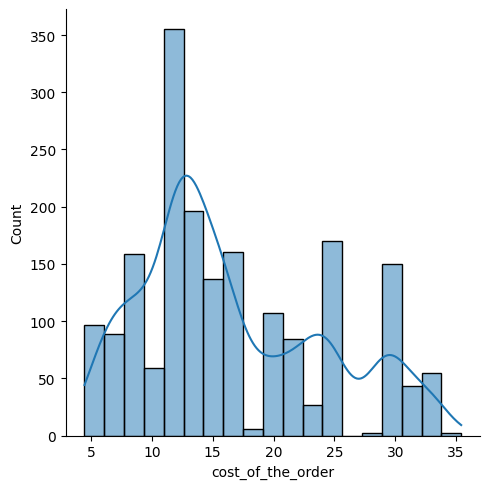

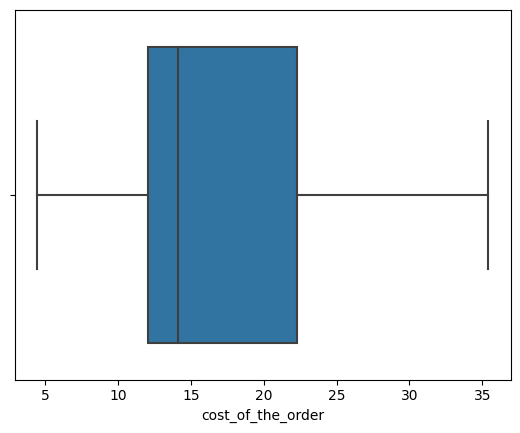

In [21]:
# Write the code here
sns.displot(data=df,x='cost_of_the_order', kde = True)
plt.show()
sns.boxplot(data=df,x='cost_of_the_order')
plt.show()

#### Observations:
The distribution of cost of order though looks normal with no outliers, it has multiple modes, at \$12, \$24, and \$30. It would be interesting to understand what is driving the multi-modality.

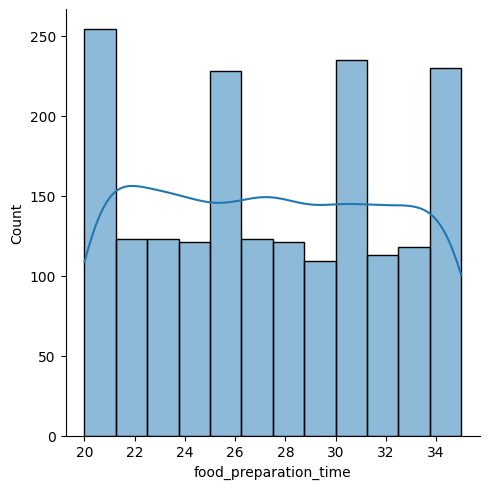

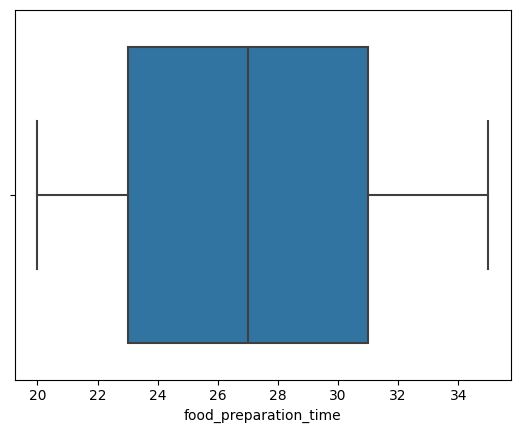

In [22]:
sns.displot(data=df,x='food_preparation_time', kde = True)
plt.show()
sns.boxplot(data=df,x='food_preparation_time')
plt.show()

#### Observations:
The food preparation time ranges between 20 - 34 mins. It would be interesting to understand what drives this large spread.

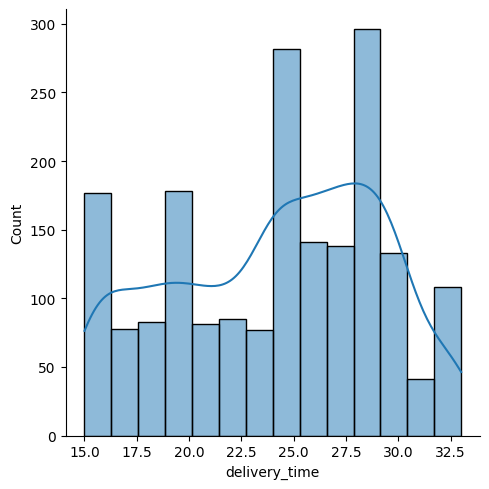

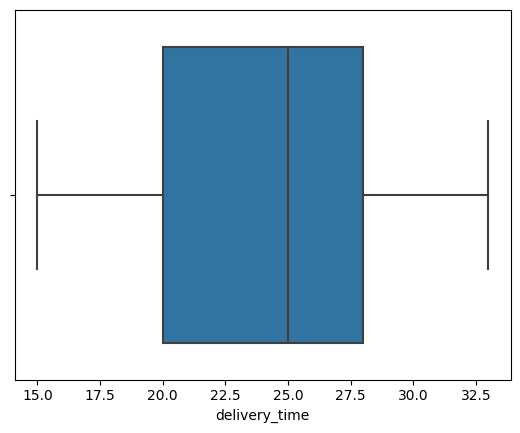

In [23]:
sns.displot(data=df,x='delivery_time', kde = True)
plt.show()
sns.boxplot(data=df,x='delivery_time')
plt.show()

#### Observations:
The min delivery time is 15 mins and the max is 33 mins, with deliveries happening with this bucket. Majority of deliveries have taken around 27 mins, but there has been a significant # of deliveries that have been done in 15 mins.


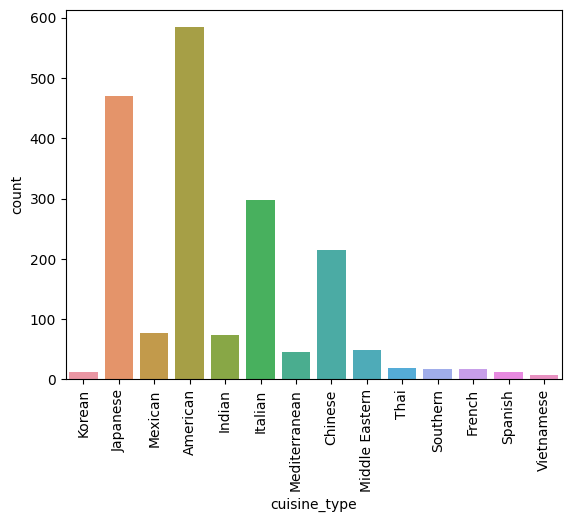

In [24]:
sns.countplot(data=df,x='cuisine_type')
plt.xticks(rotation=90)
plt.show()

#### Observations:
American, Japanese, Italian and Chinese were the top 4 cuisines and made up 83% of total orders.

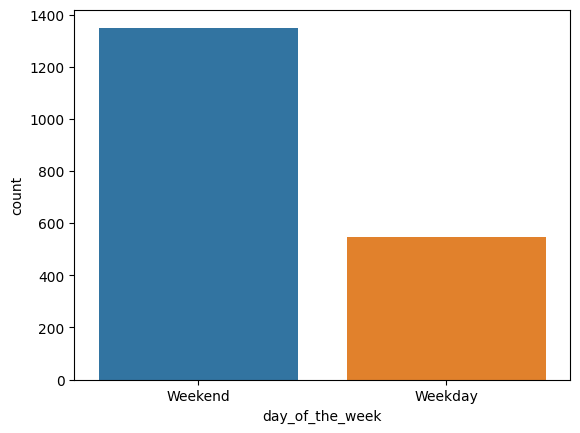

In [25]:
sns.countplot(data=df,x='day_of_the_week')
plt.show()

#### Observations:
71% of the orders were placed on weekends

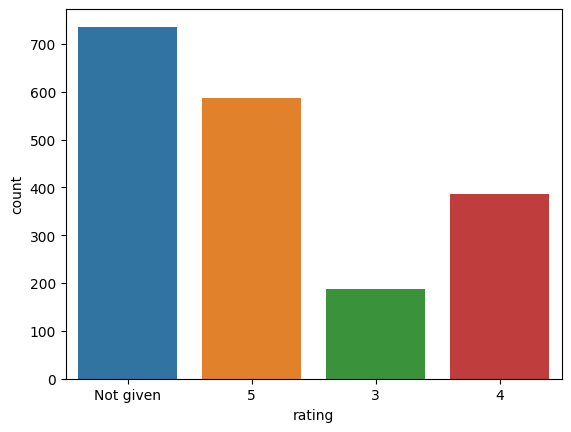

In [26]:
sns.countplot(data=data,x='rating')
plt.show()

#### Observations:
Though 39% of the customers didn't give any rating (not displayed in the above chart), 51% of the customers who did rate, rated the service at 5*, 33% rated 4*, 16% rated 3*

### **Question 7**: Which are the top 5 restaurants in terms of the number of orders received? [1 mark]

In [27]:
# Write the code here
# top restaurants for orders received
df["restaurant_name"].value_counts()

Shake Shack                  219
The Meatball Shop            132
Blue Ribbon Sushi            119
Blue Ribbon Fried Chicken     96
Parm                          68
                            ... 
Sushi Choshi                   1
Dos Caminos Soho               1
La Follia                      1
Philippe Chow                  1
'wichcraft                     1
Name: restaurant_name, Length: 178, dtype: int64

#### Observations:
The top 5 restaurants are Shake Shack, The Meatball Shop, Blue Ribbon Sushi, Blue Ribbon Fried Chicken, Parm

### **Question 8**: Which is the most popular cuisine on weekends? [1 mark]

In [28]:
# Write the code here
# Top cuisines on weekends
df[df['day_of_the_week'] == "Weekend"].cuisine_type.value_counts()

American          415
Japanese          335
Italian           207
Chinese           163
Mexican            53
Indian             49
Mediterranean      32
Middle Eastern     32
Thai               15
French             13
Korean             11
Southern           11
Spanish            11
Vietnamese          4
Name: cuisine_type, dtype: int64

#### Observations:
American cuisine is the most popular cuisine over the weekends


### **Question 9**: What percentage of the orders cost more than 20 dollars? [2 marks]

In [29]:
#average cost of the order
df['cost_of_the_order'].mean()

16.498851422550054

In [30]:
# Write the code here
#% of order that cost > $20
(df["cost_of_the_order"] > 20.0).sum()/df.shape[0]

0.2924130663856691

#### Observations:

29.24% of orders cost more than \$20


### **Question 10**: What is the mean order delivery time? [1 mark]

In [31]:
#average food prep time
df.food_preparation_time.mean()

27.371970495258168

In [32]:
# Write the code here
#average delivery time
df.delivery_time.mean()

24.161749209694417

#### Observations:
The average delivery time for an order is 24 mins

### **Question 11:** The company has decided to give 20% discount vouchers to the top 3 most frequent customers. Find the IDs of these customers and the number of orders they placed. [1 mark]

In [33]:
# Write the code here
#df_cust_id = df['customer_id'].value_counts()
df['customer_id'].value_counts().head(3)

52832    13
47440    10
83287     9
Name: customer_id, dtype: int64

#### Observations:
The 3 customers with the most frequent orders are 52832 (13 orders), 47440 (10 orders), 83287 (9 orders)

### Multivariate Analysis

### **Question 12**: Perform a multivariate analysis to explore relationships between the important variables in the dataset. (It is a good idea to explore relations between numerical variables as well as relations between numerical and categorical variables) [10 marks]


<ipython-input-34-d58c073f9c8d>:4: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  matrix = np.triu(df.corr())
<ipython-input-34-d58c073f9c8d>:5: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(df.corr(),annot=True,cmap='coolwarm',fmt = ".2f", vmin=-1,vmax=1,mask = matrix)


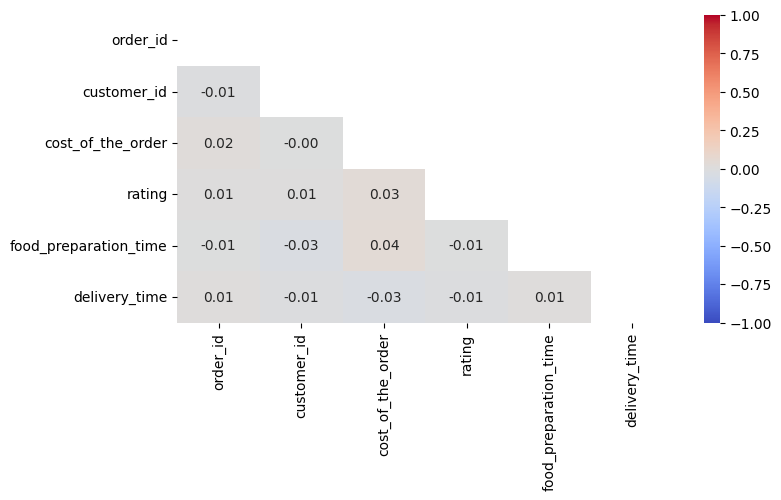

In [34]:
# Write the code here
#plot the heatmap to show correlation between variables
plt.figure(figsize=(8,4))
matrix = np.triu(df.corr())
sns.heatmap(df.corr(),annot=True,cmap='coolwarm',fmt = ".2f", vmin=-1,vmax=1,mask = matrix)
plt.show()

#### Observations:
Most variables have little to no correlation with each other since the correlation coefficients are 0

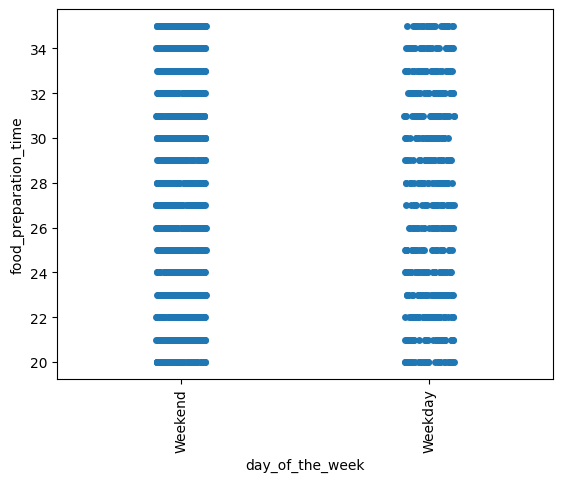

In [35]:
sns.stripplot(data=df,x='day_of_the_week',y='food_preparation_time')
plt.xticks(rotation=90)
plt.show()

#### Observations:
Food preparation time by day of the week doesn't show any specific trend

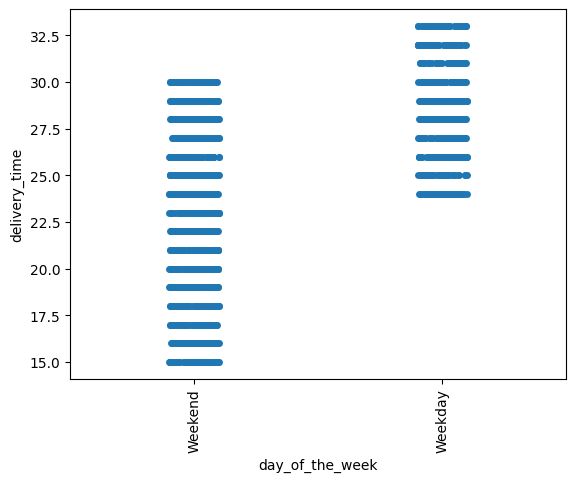

In [36]:
sns.stripplot(data=df,x='day_of_the_week',y='delivery_time')
plt.xticks(rotation=90)
plt.show()

#### Observations:
Delivery takes longer during weekdays than on weekends. It doesn't look like there is any specific cuisine type that is driving this trend

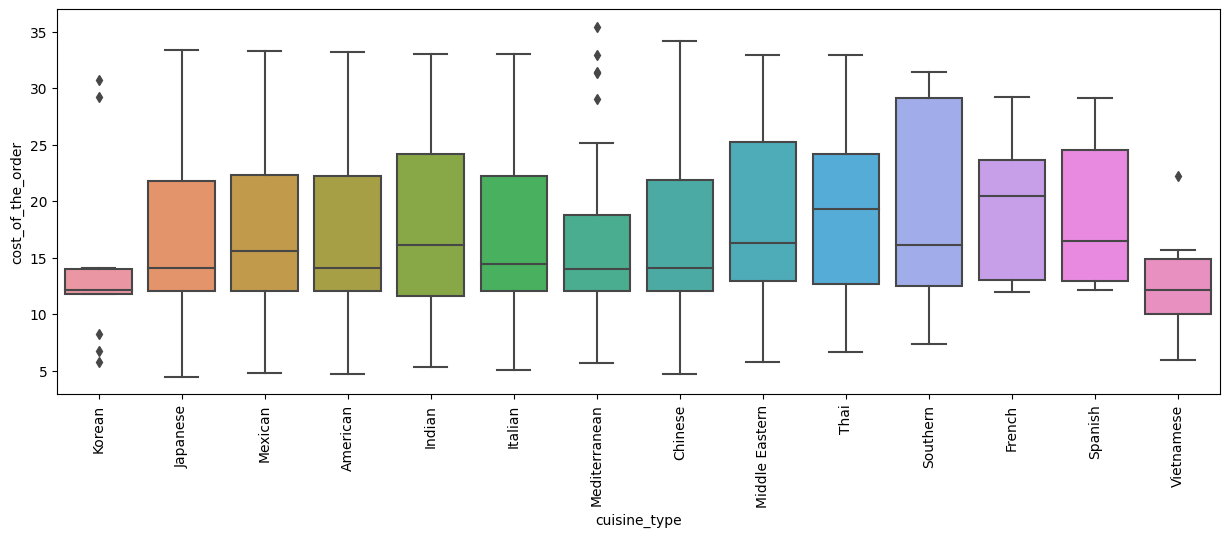

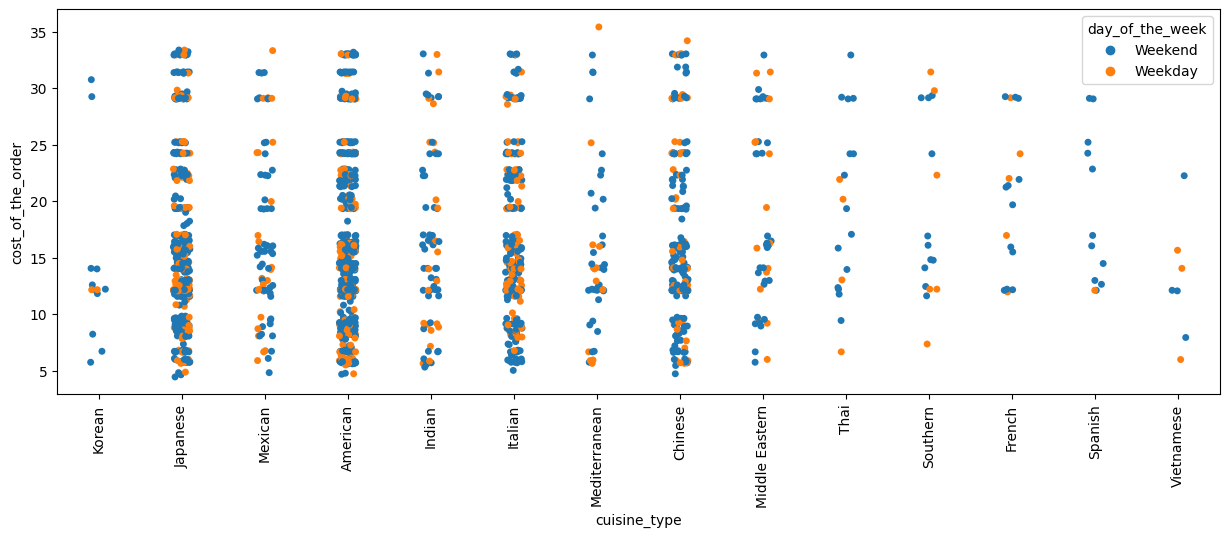

In [37]:
plt.figure(figsize=(15,5))
plt.xticks(rotation=90)
sns.boxplot(data=df,x='cuisine_type',y='cost_of_the_order')
plt.show()
plt.figure(figsize=(15,5))
plt.xticks(rotation=90)
sns.stripplot(data=df,x='cuisine_type',y='cost_of_the_order',hue = "day_of_the_week")
plt.show()

#### Observations
Cuisines like Korean, Vietnamese, Thai, Southern, French, Spanish don't have enough data points to draw meaningful conclusions.
Of the remaining cuisines, the cost of the order for the middle 50% of the orders for American, Japanese, Mexican and Italian is between \$12 and \$22.
The average order for Indian and Middle Eastern cuisines is slightly higher than that of the rest

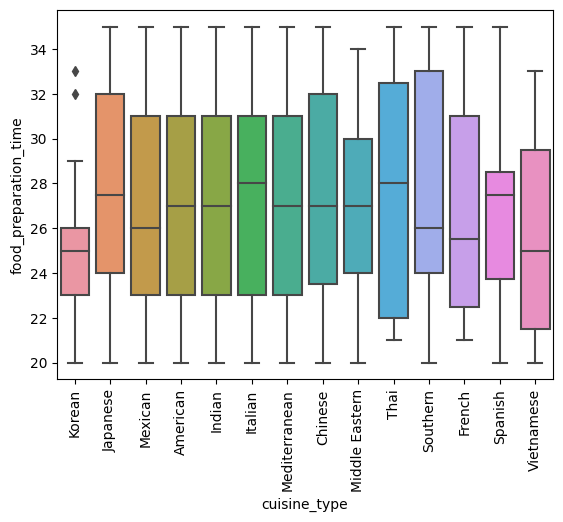

In [38]:
#plt.figure(figsize=(15,5))
sns.boxplot(data=df,x='cuisine_type',y='food_preparation_time')
plt.xticks(rotation=90)
plt.show()

#### Observation
Japanese and Chines restaurant's food preparation time distribution is slightly larger than that of the other top cuisines.

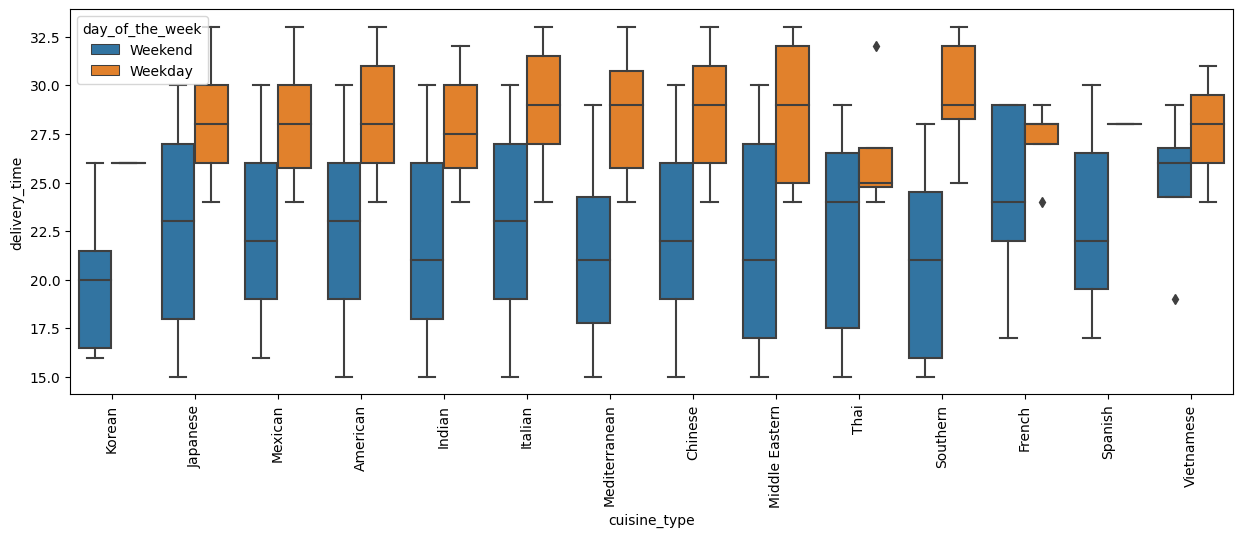

In [39]:
plt.figure(figsize=(15,5))
sns.boxplot(data=df,x='cuisine_type',y='delivery_time',hue = 'day_of_the_week')
plt.xticks(rotation=90)
plt.show()

#### Observation
The delivery time is longer during weekdays across restaurants of most cuisine types

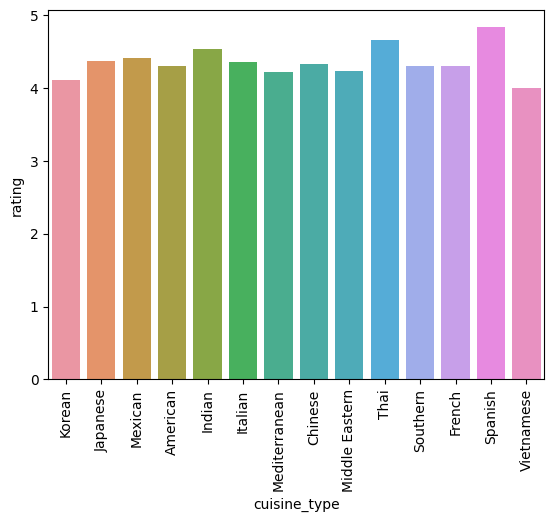

In [40]:
#plt.figure(figsize=(15,5))
sns.barplot(data=df,x='cuisine_type',y='rating',errorbar = None)
plt.xticks(rotation=90)
plt.show()

In [41]:
#total time = food_prep_time + delivery_time
#df["total_time"] = df['food_preparation_time'] + df['delivery_time']
data["total_time"] = data['food_preparation_time'] + data['delivery_time']


/usr/local/lib/python3.10/dist-packages/seaborn/categorical.py:3544: UserWarning: 37.9% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
/usr/local/lib/python3.10/dist-packages/seaborn/categorical.py:3544: UserWarning: 28.4% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
/usr/local/lib/python3.10/dist-packages/seaborn/categorical.py:3544: UserWarning: 11.4% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
/usr/local/lib/python3.10/dist-packages/seaborn/categorical.py:3544: UserWarning: 49.9% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
/usr/local/lib/python3.10/dist-packages/seaborn/categorical.py:3544: UserWarning: 40.1% of the points cannot be plac

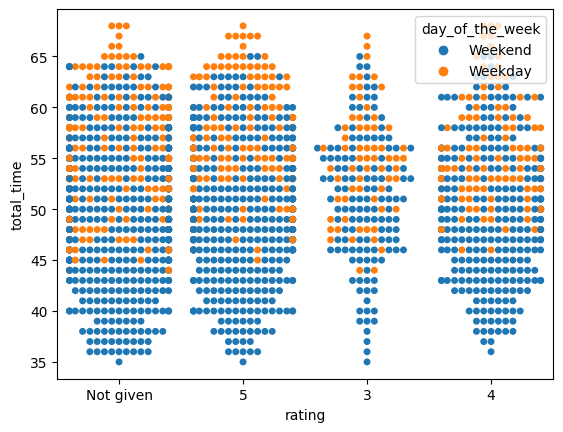

In [42]:
sns.swarmplot(data=data,x="rating",y='total_time',hue = "day_of_the_week")
plt.show()

#### Observation
Long order to delivery time is not a driver for low rating. It would be interesting to understand what other factors influence low rating

### **Question 13:** The company wants to provide a promotional offer in the advertisement of the restaurants. The condition to get the offer is that the restaurants must have a rating count of more than 50 and the average rating should be greater than 4. Find the restaurants fulfilling the criteria to get the promotional offer. [3 marks]

In [43]:
# Write the code here
#identify restaurants that have rating count of more than 50
restaurant_rating_count_grt_50 = df.groupby("restaurant_name")["rating"].count()>50
restaurant_rating_count_grt_50 = restaurant_rating_count_grt_50.to_frame()
restaurant_rating_count_grt_50 = restaurant_rating_count_grt_50.loc[restaurant_rating_count_grt_50.rating == True]
restaurant_rating_count_grt_50.drop("rating",axis = 1,inplace = True)
#restaurant_rating_count_grt_50

In [44]:
#identify restaurants that have average rating greater than 4
restaurant_rating_avg_greater_4 = df.groupby("restaurant_name")["rating"].mean()>4
restaurant_rating_avg_greater_4 = restaurant_rating_avg_greater_4.to_frame()
restaurant_rating_avg_greater_4 = restaurant_rating_avg_greater_4.loc[restaurant_rating_avg_greater_4.rating == True]
restaurant_rating_avg_greater_4.drop("rating",axis = 1, inplace = True)
#restaurant_rating_avg_greater_4

In [45]:
#merge the 2 data frames to get the list of restaurants that meet both criteria
pd.merge(restaurant_rating_avg_greater_4,restaurant_rating_count_grt_50,how = "inner", on = "restaurant_name")

""
restaurant_name
Blue Ribbon Fried Chicken
Blue Ribbon Sushi
Shake Shack
The Meatball Shop


#### Observations:
There are 4 restaurants that meet the criteria of having the rating average > 4, and # of ratings > 50. These restaurants are Blue Ribbon Fried Chicken, Blue Ribbon Sushi, Shake Shack, and The Meatball Shop

### **Question 14:** The company charges the restaurant 25% on the orders having cost greater than 20 dollars and 15% on the orders having cost greater than 5 dollars. Find the net revenue generated by the company across all orders. [3 marks]

In [46]:
# Write the code here
def revenue (x):
  if x > 20:
    return x*0.25
  elif x > 5:
    return x*.15
  else:
    return 0


In [47]:
df['revenue'] = df['cost_of_the_order'].apply(revenue)

In [48]:
df['revenue'].sum()

6166.303

#### Observations:

The total revenue earned is \$6,166.30


### **Question 15:** The company wants to analyze the total time required to deliver the food. What percentage of orders take more than 60 minutes to get delivered from the time the order is placed? (The food has to be prepared and then delivered.) [2 marks]

In [49]:
# Write the code here
df["total_time"] = df['food_preparation_time'] + df['delivery_time']
(df['total_time'] > 60).sum()/df.shape[0]

0.1053740779768177

#### Observations:

10.5% of the orders took more than 60 mins to deliver from the time the order was placed.


### **Question 16:** The company wants to analyze the delivery time of the orders on weekdays and weekends. How does the mean delivery time vary during weekdays and weekends? [2 marks]

In [50]:
# Write the code here
df.groupby(["day_of_the_week"])["delivery_time"].mean()

day_of_the_week
Weekday   28.34
Weekend   22.47
Name: delivery_time, dtype: float64

#### Observations:

Weekend average delivery time is 22.47 min, vs. that for weekday is 28.34 min. Hence, average delivery time on weekdays is ~6 mins slower than that on weekends.

### Conclusion and Recommendations

### **Question 17:** What are your conclusions from the analysis? What recommendations would you like to share to help improve the business? (You can use cuisine type and feedback ratings to drive your business recommendations.) [6 marks]

### Conclusions:
I analyzed the data of ~1900 orders in New York across 1200 customers, 178 restaurants of 14 cuisine types. The obejective of the analysis is to understand how to improve the business. Below are the conclusions:


*  Average cost of order is \$16.5. 29% of the orders are > \$20

*  Average food preparation time is 27 min (consistent across cuisine types), and average food delivery time is 24 mins

*  71% of the orders were placed over the weekend. However, average delivery time during the weekdays is 6 mins slower than that during the weekends

*  10% of the orders took over 60 mins to delivery. However, it didn’t impact rating (16% of orders that delivered after 60 mins were rated 3*, which was inline with total % of orders that received 3*)


*  Top 4 stores (Shake Shack, The Meatball Shop, Blue Ribbon Sushi, Blue Ribbon Fried Chicken) did 30% of orders, had at least 50 ratings each, and averaged rating of 4.3 (in-line with total average rating)

### Recommendations:

*  Only 29% of the orders are placed during weekdays. Ensure there is capacity at the restaruants, and have human capital to support weekday business

*  Look to create incentives such as loyalty programs for high value repeat  customers

*  31% of the customers didn’t rate. Reducing this number will increase customer engagement and help better understand their preferences

*  Further analyze what is driving long delivery time during weekdays

